<div style="width: 100%; overflow: hidden;">
    <a href="http://www.uc.pt/fctuc/dei/">
    <div style="display: block;margin-left: auto;margin-right: auto; width: 100%;"><img src="https://eden.dei.uc.pt/~naml/images_ecos/dei25.png"  /></div>
    </a>
</div>

In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
#import torch

%matplotlib inline
# Just to make plots look better
plt.rcParams["figure.figsize"] = (4,4)
plt.rcParams['axes.grid'] = True
plt.style.use('fivethirtyeight')
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['lines.linewidth'] = 3

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: C:\Users\PC\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


<h2><font color='#3498db'>1. Introduction</font></h2>
The main goal of this notebook is to introduce a simple, yet powerful machine learning algorithm known as the ***Perceptron***. The perceptron is based on a single computational unit, the neuron, that also is used to make up Neural Networks. This algorithm was initially proposed in 1957 by Frank Rosenblatt and works by making a linear combination of the input values, adding a bias term and producing a binary output (i.e., the output is 1 if the sum of the bias and weighted inputs bias is over 0 and 0 otherwise). Figure 1 presents a graphc representation of a Perceptron.



<br>
<br>
<br>
<center> 
<img src="./perceptron.png" width="500" align="center"/>
<br>
Perceptron </center>
<br>
<br>
<br>



In summary, the output of a perceptron is given by $$\hat{y}=f(\sum_{i=1}^n w_i*x_i+b)$$ where, *n* is the total number of inputs. In a geometric interpretation, the perceptron is essentially learning a decision boundary in an n-dimensional space to separate two classes. If the input vector lies on one side of this boundary, the perceptron outputs 1; otherwise, it outputs 0.

Despite its simple architecture, Rosenblatt's Perceptron Convergence Theorem states that a perceptron will converge and find a solution if the data is linearly separable. In other words, if there exists a hyperplane that can completely separate the two classes of data points, the perceptron learning algorithm will eventually find the appropriate weights and bias to achieve this separation.




Although the Perceptron can handle real number and boolean problems, the latter are often used to exemplify its inner workings. In particular, we are going to focus on the OR, NOR and XOR problems. The boolean OR consists of a logical function that outputs True (here represented by the value 1) if at least one of its inputs is itself True; and False (0) otherwise. Considering only two inputs, there are only four possible combinations:

<br>
<br>
<br>
<center><b>Input Data (Logical OR)</b> </center>
<br>
<center>
<table>
  <tr>
    <th>X</th>
    <th>Y</th> 
    <th>Output</th>
  </tr>
  <tr>
    <td>0</td>
    <td>0</td> 
    <td>0</td>
  </tr>
  <tr>
    <td>0</td>
    <td>1</td> 
    <td>1</td>
  </tr>
  <tr>
    <td>1</td>
    <td>0</td> 
    <td>1</td>
  </tr>
  <tr>
    <td>1</td>
    <td>1</td> 
    <td>1</td>
  </tr>
</table>
</center>
<br>
<br>
<br>

Visually, it is also easy to show that this problem is linearly separable:

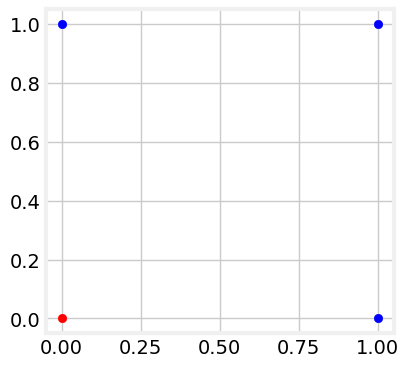

In [17]:
#OR problem
x1 = [0,0,1,1]
x2 = [0,1,0,1]

plt.scatter(x1[0],x2[0], color='red')
plt.scatter(x1[1:], x2[1:], color='blue')

plt.show()

As you can see, only the point at (0,0) will lead to a False output (in red), meaning that there are many line segments that can separate the data.

<br>
<br>
<br>

The issue now is how to find the proper parameters to solve a particular problem. We will focus on the Windrow-Hoff Rule. Assuming that we have a set of labeled data, we can have our perceptron predict an output, determine if it was correct or not, and then adjust the weights accordingly.
<br>
<br>
<br>

$$\Delta w_{ij} = \eta(y_i - \hat{y}_i) \cdot x_i$$
<br>
<center>
Learning Rule: It computes how much the weight should be adjusted </center>
<br>
<br>
<br>

The weights are adjusted as follows:
$$w_{ij}= w_{ij} + \Delta w_{ij}$$

With this in mind, lets code our perceptron's learning algorithm using the data of the logic OR.

### 1.1 The Algorithm
##### Initialisation
- Initialise an array of weights $w_{ij}$ to small random numbers. They can be positive or negative

##### Training 
- For t iterations or until a certain error threshold is not achieved:
    - for each input vector:
        - compute the activation of each neuron $j$ using the activation function $f(x)$: $$\hat{y}_j=f( x \cdot w + b)$$
        - update each weights individually using the learning rule $$\Delta w_{ij} = \eta * ( x^T \cdot (y_j - \hat{y}_j))$$
        

##### Prediction
- Compute the predictions using:
$$\hat{y}=f(x \cdot w + b)$$

<h2><font color='#3498db'>2. Perceptron Code</font></h2>
Now it is time for you to code a Perceptron. Using the information above and the input data, develop a class named Perceptron that learns based on a set of labeled examples.

Since we are dealing mostly with matrix operations, I recommend that you use the `Numpy`numerical library for Python. this library provides us with several methods for matrix the manipulations, such as the Dot product: https://numpy.org/doc/stable/reference/generated/numpy.dot.html

<h3><font color='#6A30BB'>Exercise #2.1 </font></h3>
Code the Perceptron


In [1]:
class Perceptron:
    def __init__(self, number_of_inputs, number_of_iterations=1000, learning_rate=0.01):
        self.number_of_iterations = number_of_iterations
        self.learning_rate = learning_rate
        self.weights = np.random.random((number_of_inputs + 1, 1))*0.1-0.05

    def add_bias(self, inputs):
        """
            The bias is a parameter that is added to the weighted sum of the inputs before applying the activation function. 
            Its purpose is to provide an additional degree of freedom to the model, allowing it to shift the activation function 
            to the left or right. 
            To simplify the implementation of the perceptron (or the neural networks) a bias with the value of 1 is concatenated to every input vector.
            This way the bias term can be included in the dot product operation between the weights and the inputs. This makes it possible to handle the bias 
            as part of the weight matrix. Without this, the bias would need to be added explicitly as a separate step after computing the weighted sum of the inputs.
            For example, consider the inputs for the logical OR:
            [   [1. 1.]
                [1. 0.]
                [0. 1.]
                [0. 0.]
            ]
        The bias will be added as a third input, and the final set of inputs will be:
            [   [1. 1. 1.]
                [1. 0. 1.]
                [0. 1. 1.]
                [0. 0. 1.]
            ]
        """
        return np.concatenate((inputs,np.ones((inputs.shape[0],1))),axis=1)

    def predict(self, inputs):
        inputs = self.add_bias(inputs)
        return self.forward_propagation(inputs)
    
    def forward_propagation(self, inputs):
        ## YOUR CODE HERE ##
        outp = np.dot(inputs,self.weights)
        return np.where(outp>0,1,0)

    def train(self, training_inputs, targets):
        training_inputs = self.add_bias(training_inputs)
        for iteration in range(self.number_of_iterations):
            ## YOUR CODE HERE ##
            E = targets - self.forward_propagation(training_inputs)
            self.weights = self.weights + self.learning_rate * np.dot(np.transpose(training_inputs),E)
            #print("weights:")
            #print(self.weights)
    def accuracy(self,predict,labels):
        if np.mean(predict == labels) == 1:
            print("gg")
        else:
            print("i need to train more.....")

<h3><font color='#6A30BB'>Exercise #2.2 </font></h3>
Evaluate the performance of the Perceptron in the dataset provided above.

In [2]:
import numpy as np
# Logical OR
training_inputs = np.array([[1, 1], [1, 0], [0, 1], [0, 0]])
labels = np.array([[1], [1], [1], [0]])

#Your code here
percep = Perceptron(2)
percep.train(training_inputs,labels)
predict = percep.predict(training_inputs)
percep.accuracy(predict,labels)



gg


<h3><font color='#6A30BB'>Exercise #2.3</font></h3>
Create a perceptron that constructs the logical NOR.

In [58]:
import numpy as np
# Logical NOR 
training_inputs = np.array([[1, 1], [1, 0], [0, 1], [0, 0]])
labels = np.array([[0], [0], [0], [1]])

#your code here
percep = Perceptron(2)
percep.train(training_inputs,labels)
predict = percep.predict(training_inputs)
percep.accuracy(predict,labels)

gg


<h3><font color='#6A30BB'>Exercise #2.4 </font></h3>
Create a perceptron to the logical XOR. Can you build it? If not provide a reason why.

In [59]:
import numpy as np
# Logical XOR
training_inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
labels = np.array([[0], [1], [1], [0]])
percep = Perceptron(2)
percep.train(training_inputs,labels)
predict = percep.predict(training_inputs)
percep.accuracy(predict,labels)

i need to train more.....
